In [3]:
! pip install numpy
! pip install pandas
! pip install matplotlip
! pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [5]:
df = pd.read_csv('titanic3.csv')

df.columns = ['PassengerId' + col for col in df.columns]

df.insert(0, 'PassengerId', range(1, 1 + len(df)))

df.to_csv('titanic.csv', index=False)

In [6]:
dtype = np.dtype([
    ('pclass', int),
    ('survived', int),
    ('name', 'U50'),
    ('sex', 'U10'),
    ('age', float),
    ('sibsp', int),
    ('parch', int),
    ('ticket', 'U20'),
    ('fare', float),
    ('cabin', 'U20'),
    ('embarked', 'U1'),
    ('boat', 'U10'),
    ('body', float),
    ('home_dest', 'U50')
])

In [7]:
def data_structuring():
    data = []
    with open('titanic3.csv', 'r') as file:
        read = csv.reader(file)
        next(read)
        for row in read:
            try:
                cleaned_row = [col if col else '0' for col in row]
                data.append(tuple(cleaned_row))
            except ValueError as e:
                print(f"Error processing row: {row}, Error: {e}")
    structured_data = np.array(data, dtype=dtype)
    return structured_data

In [8]:
arr = data_structuring()
arr

array([(1, 1, 'Allen, Miss. Elisabeth Walton', 'female', 29.    , 0, 0, '24160', 211.3375, 'B5', 'S', '2', 0., 'St Louis, MO'),
       (1, 1, 'Allison, Master. Hudson Trevor', 'male',  0.9167, 1, 2, '113781', 151.55  , 'C22 C26', 'S', '11', 0., 'Montreal, PQ / Chesterville, ON'),
       (1, 0, 'Allison, Miss. Helen Loraine', 'female',  2.    , 1, 2, '113781', 151.55  , 'C22 C26', 'S', '0', 0., 'Montreal, PQ / Chesterville, ON'),
       ...,
       (3, 0, 'Zakarian, Mr. Ortin', 'male', 27.    , 0, 0, '2670',   7.225 , '0', 'C', '0', 0., '0'),
       (3, 0, 'Zimmerman, Mr. Leo', 'male', 29.    , 0, 0, '315082',   7.875 , '0', 'S', '0', 0., '0'),
       (0, 0, '0', '0',  0.    , 0, 0, '0',   0.    , '0', '0', '0', 0., '0')],
      dtype=[('pclass', '<i8'), ('survived', '<i8'), ('name', '<U50'), ('sex', '<U10'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('ticket', '<U20'), ('fare', '<f8'), ('cabin', '<U20'), ('embarked', '<U1'), ('boat', '<U10'), ('body', '<f8'), ('home_dest', '<

In [9]:
def overall_survival_rate(arr):
    survived_count = arr['survived'].sum()
    total_passengers = arr['survived'].shape
    survival_rate = (survived_count / total_passengers) * 100
    return survival_rate

def survival_by_class(df):
    survival_by_class = df.groupby('pclass')['survived'].mean() * 100
    return survival_by_class

def survival_by_gender(df):
    survival_by_gender = df.groupby('sex')['survived'].mean() * 100
    return survival_by_gender

def survival_by_age_group(df, bins=[0, 18, 30, 50, 100]):
    df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=['0-18', '19-30', '31-50', '51+'])
    survival_by_age_group = df.groupby('aAgeGroup')['survived'].mean() * 100
    return survival_by_age_group

def survival_by_family_size(df):
    df['FamilySize'] = df['sibsp'] + df['parch'] + 1
    survival_by_family_size = df.groupby('FamilySize')['survived'].mean() * 100
    return survival_by_family_size

In [10]:
def passenger_count_by_class(df):
    passenger_count_by_class = df['Pclass'].value_counts().sort_index()
    return passenger_count_by_class

def gender_distribution(df):
    gender_distribution = df['Sex'].value_counts()
    return gender_distribution

def age_distribution(df):
    age_distribution = df['Age'].plot(kind='hist', bins=20, edgecolor='black')
    plt.xlabel('Age')
    plt.title('Age Distribution of Passengers')
    plt.show()

def embarkation_port_analysis(df):
    embarkation_port_counts = df['Embarked'].value_counts()
    return embarkation_port_counts

In [11]:
def ticket_fare_distribution(df):
    fare_distribution = df['Fare'].plot(kind='hist', bins=20, edgecolor='black')
    plt.xlabel('Fare')
    plt.title('Ticket Fare Distribution')
    plt.show()

def average_fare_by_class(df):
    average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
    return average_fare_by_class

def fare_vs_survival(df):
    fare_vs_survival = sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title('Fare vs. Survival')
    plt.show()

In [12]:
def passenger_demographics_by_class(df):
    class_demographics = df.groupby('Pclass').agg({'Age': 'mean', 'Sex': 'value_counts'})
    return class_demographics

def survival_rates_by_class_and_gender(df):
    survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
    return survival_rates

def fare_analysis_by_class(df):
    fare_analysis = sns.boxplot(x='Pclass', y='Fare', data=df)
    plt.title('Fare Analysis by Class')
    plt.show()

In [13]:
def family_relationships_and_survival(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    family_survival = df.groupby('FamilySize')['Survived'].mean() * 100
    return family_survival

In [14]:
df = pd.read_csv('titanic3.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [15]:
overall_survival_rate(arr)


array([38.16793893])

In [16]:
survival_by_class(df)

pclass
1.0    61.919505
2.0    42.960289
3.0    25.528914
Name: survived, dtype: float64

In [17]:
survival_by_family_size(df)

FamilySize
1.0     30.253165
2.0     53.617021
3.0     56.603774
4.0     69.767442
5.0     27.272727
6.0     20.000000
7.0     25.000000
8.0      0.000000
11.0     0.000000
Name: survived, dtype: float64

In [18]:
def survival_rate_by_category(data, category_col):
    categories = data[category_col].unique()
    survival_rates = []
    for category in categories:
        total_passengers = len(data[data[category_col] == category])
        if total_passengers == 0:
            continue
        survived_passengers = len(data[(data[category_col] == category) & (data['survived'] == 1)])
        survival_rate = survived_passengers / total_passengers
        survival_rates.append((category, survival_rate))
    return survival_rates

In [27]:
survival_rates_sex = survival_rate_by_category(arr, 'sex')
survival_rates_sex

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [26]:
survival_rate_by_class = survival_rate_by_category(df, 'pclass')
survival_rate_by_class

[(np.float64(1.0), 0.6191950464396285),
 (np.float64(2.0), 0.4296028880866426),
 (np.float64(3.0), 0.2552891396332863)]

In [21]:
def plot_survival_rate(data, category_col):
    survival_rates = survival_rate_by_category(data, category_col)
    categories, rates = zip(*survival_rates)
    plt.figure(figsize=(8, 5))
    plt.bar(categories, rates, color='skyblue')
    plt.xlabel(category_col.capitalize())
    plt.ylabel('Survival Rate')
    plt.title(f'Survival Rates by {category_col.capitalize()}')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

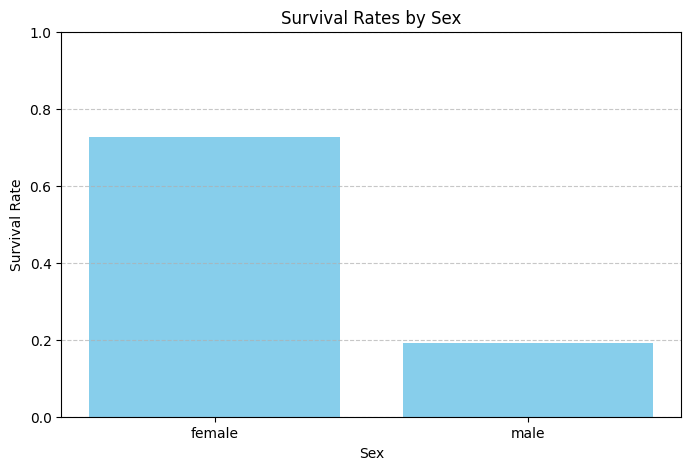

In [22]:
plot_survival_rate(df, 'sex')

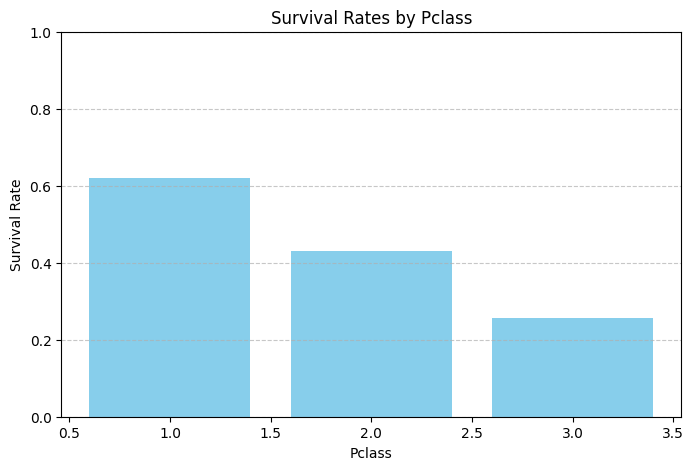

In [24]:
plot_survival_rate(df, 'pclass')